# Assignment 4 WBT 
# Name: Moses Mbabaali 
# Matricola: 4846019

In [125]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD, Adam, Adagrad, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [126]:
# Get the data
with open("semeion.data") as textFile:
    data = [line.split() for line in textFile]

In [127]:
# Just reconverted the original data into this way it was way easier operating in this mode 
data = np.asarray(data)
data = data.astype(float)

In [128]:
# The x values 
X = data[:,:-10]
print(X.shape)
X

(1593, 256)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [129]:
# The y values 
y = data[:,-10:]
print(y.shape)
y

(1593, 10)


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [130]:
# Matrix as a 16 by 16 for an individual element
X[0].reshape((16,16))

array([[0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,

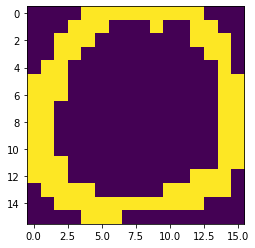

In [131]:
# Visualizing the 16x16 matrix as image
plt.imshow(X[7].reshape((16,16)))

In [132]:
# Data splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2)

In [133]:
# Simple sequential model
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape = (X.shape[1],), use_bias=True, bias_initializer='ones'))
model.add(Dense(y.shape[1], activation='sigmoid', use_bias=True, bias_initializer='ones'))
my_optimizer = SGD(lr=0.1)
model.compile(optimizer=my_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping_monitor = EarlyStopping(patience=2)

history = model.fit(X_train, y_train, validation_split=0.3, epochs=60, verbose=2, callbacks=[early_stopping_monitor])
history

score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])
print('Test loss:', score[0])

y_pred = model.predict(X_test)

Epoch 1/60
25/25 - 1s - loss: 2.3338 - accuracy: 0.1577 - val_loss: 2.2482 - val_accuracy: 0.0955
Epoch 2/60
25/25 - 0s - loss: 2.0627 - accuracy: 0.3026 - val_loss: 1.9171 - val_accuracy: 0.3970
Epoch 3/60
25/25 - 0s - loss: 1.8264 - accuracy: 0.5167 - val_loss: 1.6861 - val_accuracy: 0.5433
Epoch 4/60
25/25 - 0s - loss: 1.5914 - accuracy: 0.6641 - val_loss: 1.5234 - val_accuracy: 0.4179
Epoch 5/60
25/25 - 0s - loss: 1.3750 - accuracy: 0.7231 - val_loss: 1.2430 - val_accuracy: 0.7254
Epoch 6/60
25/25 - 0s - loss: 1.1800 - accuracy: 0.7846 - val_loss: 1.0888 - val_accuracy: 0.7612
Epoch 7/60
25/25 - 0s - loss: 1.0396 - accuracy: 0.8154 - val_loss: 0.9414 - val_accuracy: 0.8507
Epoch 8/60
25/25 - 0s - loss: 0.9175 - accuracy: 0.8462 - val_loss: 0.8518 - val_accuracy: 0.8299
Epoch 9/60
25/25 - 0s - loss: 0.8202 - accuracy: 0.8474 - val_loss: 0.7124 - val_accuracy: 0.8776
Epoch 10/60
25/25 - 0s - loss: 0.7373 - accuracy: 0.8551 - val_loss: 0.6410 - val_accuracy: 0.8985
Epoch 11/60
25/25 -

In [136]:
y_predl = model.predict(X_test)
predl = np.argmax(y_predl, axis = 1)
predl

array([7, 3, 5, 4, 1, 0, 8, 4, 6, 7, 3, 4, 1, 3, 4, 3, 6, 3, 2, 9, 4, 5,
       7, 3, 7, 3, 3, 8, 9, 2, 3, 6, 8, 2, 6, 0, 4, 3, 5, 6, 0, 1, 4, 9,
       1, 2, 7, 2, 7, 4, 8, 2, 9, 4, 7, 9, 1, 6, 0, 1, 0, 0, 6, 9, 4, 1,
       3, 0, 8, 3, 7, 5, 4, 2, 0, 0, 4, 4, 1, 7, 4, 0, 2, 6, 2, 7, 2, 3,
       3, 8, 7, 3, 2, 3, 2, 0, 0, 9, 7, 1, 0, 4, 3, 9, 6, 9, 1, 4, 9, 4,
       2, 7, 0, 8, 9, 9, 9, 3, 8, 4, 1, 4, 8, 3, 0, 3, 3, 3, 2, 6, 3, 5,
       2, 5, 3, 9, 6, 1, 9, 0, 0, 0, 7, 9, 3, 2, 9, 9, 2, 6, 7, 3, 2, 1,
       3, 2, 3, 0, 0, 5, 9, 8, 5, 4, 0, 1, 1, 1, 5, 7, 3, 7, 2, 6, 1, 8,
       3, 9, 6, 4, 3, 9, 1, 0, 6, 2, 8, 3, 1, 2, 4, 5, 5, 1, 3, 8, 0, 0,
       6, 7, 9, 7, 2, 0, 8, 2, 6, 7, 7, 2, 3, 4, 3, 5, 2, 6, 5, 0, 3, 0,
       5, 0, 2, 4, 7, 2, 5, 0, 9, 5, 4, 9, 4, 3, 1, 6, 3, 9, 4, 3, 8, 8,
       1, 7, 9, 3, 3, 2, 6, 0, 5, 0, 7, 8, 5, 0, 4, 5, 8, 0, 8, 2, 5, 9,
       9, 3, 3, 3, 0, 1, 3, 6, 2, 5, 7, 8, 9, 3, 0, 6, 3, 1, 9, 0, 8, 0,
       3, 3, 3, 5, 4, 8, 7, 3, 1, 9, 6, 3, 2, 8, 5,

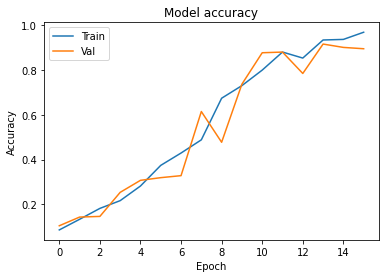

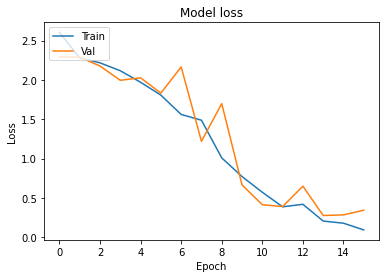

In [44]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
plot_history(history)

In [39]:
#Layered sequential model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape = (X.shape[1],), use_bias=True, bias_initializer='ones'))
model.add(Dense(64, activation='relu', use_bias=True, bias_initializer='ones'))
model.add(Dense(32, activation='relu', use_bias=True, bias_initializer='ones'))
model.add(Dense(16, activation='relu', use_bias=True, bias_initializer='ones'))        
model.add(Dense(y.shape[1], activation='sigmoid', use_bias=True, bias_initializer='ones'))

my_optimizer = SGD(lr=0.1)
model.compile(optimizer=my_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=2)

history = model.fit(X_train, y_train, validation_split=0.3, epochs=60, verbose=2, callbacks=[early_stopping_monitor])
history

score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])
print('Test loss:', score[0])

y_pred = model.predict(X_test)

Epoch 1/60
25/25 - 1s - loss: 2.6070 - accuracy: 0.0859 - val_loss: 2.2929 - val_accuracy: 0.1045
Epoch 2/60
25/25 - 0s - loss: 2.2795 - accuracy: 0.1333 - val_loss: 2.2896 - val_accuracy: 0.1433
Epoch 3/60
25/25 - 0s - loss: 2.2178 - accuracy: 0.1821 - val_loss: 2.1772 - val_accuracy: 0.1463
Epoch 4/60
25/25 - 0s - loss: 2.1171 - accuracy: 0.2167 - val_loss: 1.9956 - val_accuracy: 0.2537
Epoch 5/60
25/25 - 0s - loss: 1.9705 - accuracy: 0.2821 - val_loss: 2.0273 - val_accuracy: 0.3075
Epoch 6/60
25/25 - 0s - loss: 1.8069 - accuracy: 0.3744 - val_loss: 1.8319 - val_accuracy: 0.3194
Epoch 7/60
25/25 - 0s - loss: 1.5610 - accuracy: 0.4295 - val_loss: 2.1658 - val_accuracy: 0.3284
Epoch 8/60
25/25 - 0s - loss: 1.4874 - accuracy: 0.4885 - val_loss: 1.2193 - val_accuracy: 0.6149
Epoch 9/60
25/25 - 0s - loss: 1.0080 - accuracy: 0.6744 - val_loss: 1.6981 - val_accuracy: 0.4776
Epoch 10/60
25/25 - 0s - loss: 0.7708 - accuracy: 0.7308 - val_loss: 0.6639 - val_accuracy: 0.7373
Epoch 11/60
25/25 -

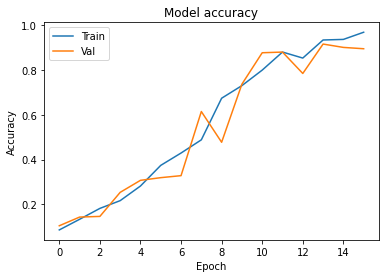

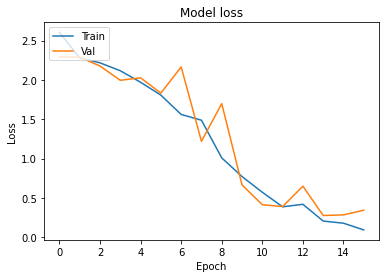

In [45]:
plot_history(history)

In [46]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Conv2D, MaxPooling2D

In [87]:
train_X, test_X, train_y, test_y = train_test_split(np.array(X).reshape((1593,16,16,-1)),\
                                                    np.array(y).reshape((1593,10)) ,test_size = 0.3, random_state=555,\
                                                   stratify=np.array(y).reshape((1593,10)))

In [116]:
#CNN
model = Sequential()
model.add(Conv2D(16, input_shape=(16, 16, 1),kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu' ))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
my_optimizer = SGD(lr=0.1) #optimizer='adam'
model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy']) #Nadam is a more stable optimizer
model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 16, 16, 16)        160       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 8, 8, 32)          4640      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)             

In [117]:
#train_X, test_X, train_y, test_y
history = model.fit(train_X, train_y, epochs=20, batch_size=128, validation_split=0.3, shuffle=False)

Epoch 1/20
7/7 [==============================] - 2s 91ms/step - loss: 2.2542 - accuracy: 0.1928 - val_loss: 2.0549 - val_accuracy: 0.2269
Epoch 2/20
7/7 [==============================] - 0s 35ms/step - loss: 1.9412 - accuracy: 0.4545 - val_loss: 1.6415 - val_accuracy: 0.5343
Epoch 3/20
7/7 [==============================] - 0s 35ms/step - loss: 1.4612 - accuracy: 0.6397 - val_loss: 1.1724 - val_accuracy: 0.6358
Epoch 4/20
7/7 [==============================] - 0s 35ms/step - loss: 1.0073 - accuracy: 0.7108 - val_loss: 0.7595 - val_accuracy: 0.7970
Epoch 5/20
7/7 [==============================] - 0s 36ms/step - loss: 0.6657 - accuracy: 0.8174 - val_loss: 0.7165 - val_accuracy: 0.7642
Epoch 6/20
7/7 [==============================] - 0s 36ms/step - loss: 0.5936 - accuracy: 0.8046 - val_loss: 0.4720 - val_accuracy: 0.8537
Epoch 7/20
7/7 [==============================] - 0s 39ms/step - loss: 0.3978 - accuracy: 0.8686 - val_loss: 0.4218 - val_accuracy: 0.8657
Epoch 8/20
7/7 [===========

In [118]:
score = model.evaluate(test_X, test_y)
print('Test accuracy:', score[1])
print('Test loss:', score[0]) 

15/15 [==============================] - 0s 5ms/step - loss: 0.1644 - accuracy: 0.9603
Test accuracy: 0.9602510333061218
Test loss: 0.16444557905197144


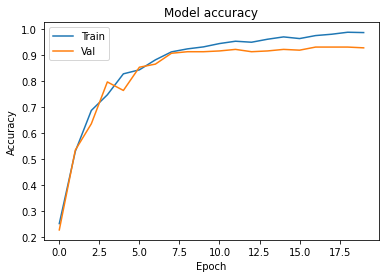

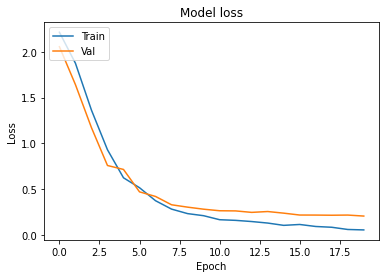

In [119]:
plot_history(history)

In [120]:
y_pred = model.predict(test_X)

In [121]:
preds = np.argmax(y_pred, axis = 1)

In [122]:
preds

array([4, 1, 5, 7, 1, 6, 1, 5, 7, 1, 3, 7, 4, 0, 8, 4, 5, 8, 7, 9, 4, 3,
       5, 1, 6, 0, 0, 2, 9, 4, 6, 0, 9, 5, 0, 8, 2, 8, 8, 8, 7, 0, 5, 0,
       0, 3, 4, 0, 4, 3, 4, 9, 7, 2, 3, 8, 8, 5, 8, 4, 4, 6, 1, 8, 0, 0,
       9, 1, 6, 8, 6, 3, 3, 2, 1, 6, 9, 6, 0, 8, 5, 1, 2, 9, 0, 3, 5, 7,
       1, 1, 3, 6, 0, 9, 2, 6, 6, 8, 2, 1, 1, 6, 4, 1, 4, 3, 6, 5, 6, 3,
       3, 3, 0, 0, 1, 9, 9, 5, 4, 7, 2, 6, 9, 2, 0, 1, 4, 5, 3, 6, 8, 9,
       6, 4, 9, 9, 2, 5, 9, 8, 6, 4, 3, 4, 5, 0, 1, 9, 4, 9, 2, 8, 2, 0,
       8, 2, 7, 5, 2, 6, 0, 8, 4, 5, 7, 1, 3, 7, 6, 8, 0, 5, 9, 8, 3, 1,
       0, 7, 2, 4, 1, 1, 4, 6, 9, 9, 0, 0, 0, 5, 9, 4, 3, 1, 5, 9, 4, 7,
       6, 0, 2, 0, 0, 4, 1, 7, 8, 4, 3, 5, 5, 2, 0, 7, 8, 3, 6, 1, 2, 7,
       1, 6, 2, 1, 1, 5, 9, 7, 2, 9, 2, 6, 0, 5, 3, 6, 3, 8, 2, 3, 3, 3,
       4, 0, 4, 4, 9, 0, 1, 1, 5, 6, 3, 4, 6, 4, 7, 9, 3, 4, 8, 1, 3, 6,
       5, 9, 0, 3, 8, 8, 5, 1, 9, 9, 9, 4, 4, 8, 2, 7, 0, 1, 6, 4, 0, 3,
       1, 7, 5, 6, 1, 1, 0, 4, 2, 2, 1, 8, 7, 3, 1,

In [219]:
#Filtering the data fir only 2 classes 
Y_cat = np.argmax(y,axis=1)
X_a = X[np.logical_or(Y_cat==3 , Y_cat==4)]
Y_a = y[np.logical_or(Y_cat==3 , Y_cat==4)]
X_train, X_test, y_train, y_test = train_test_split(X_a, Y_a, test_size = 0.3, random_state=2)

### Auto Encoders

In [284]:
import keras
from keras import layers

encoding_dim = 900
input_img = keras.Input(shape=(256,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
encoded = layers.Dense(900, activation='relu')(encoded)
decoded = layers.Dense(256, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)

tensorflow.python.keras.engine.keras_tensor.KerasTensor

In [285]:
encoder = keras.Model(input_img, encoded)

In [286]:
# This is our encod
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [287]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [288]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
1/1 [==============================] - 1s 744ms/step - loss: 0.6979 - val_loss: 0.6447
Epoch 2/50
1/1 [==============================] - 0s 120ms/step - loss: 0.6434 - val_loss: 0.5992
Epoch 3/50
1/1 [==============================] - 0s 127ms/step - loss: 0.5960 - val_loss: 0.5633
Epoch 4/50
1/1 [==============================] - 0s 114ms/step - loss: 0.5563 - val_loss: 0.5506
Epoch 5/50
1/1 [==============================] - 0s 136ms/step - loss: 0.5370 - val_loss: 0.5419
Epoch 6/50
1/1 [==============================] - 0s 117ms/step - loss: 0.5226 - val_loss: 0.5203
Epoch 7/50
1/1 [==============================] - 0s 121ms/step - loss: 0.4986 - val_loss: 0.4949
Epoch 8/50
1/1 [==============================] - 0s 140ms/step - loss: 0.4730 - val_loss: 0.4749
Epoch 9/50
1/1 [==============================] - 0s 148ms/step - loss: 0.4533 - val_loss: 0.4611
Epoch 10/50
1/1 [==============================] - 0s 127ms/step - loss: 0.4396 - val_loss: 0.4508
Epoch 11/50
1/1 [==

In [289]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

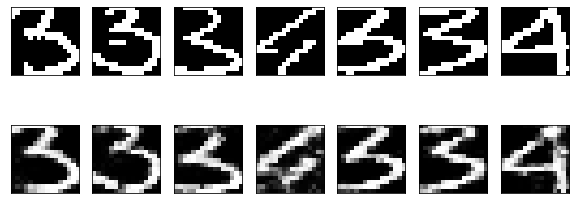

In [293]:
def plotnums(n):
    plt.figure(figsize=(10, 4))
    for i in range(n):
        """
        Takes in one integer n 
        Then plots the numbers showing the orginal and the encoded. 
        """
        
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(X_test[i].reshape(16, 16))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(16, 16))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
plotnums(7)    